In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)



Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Loading files:

### Loading the deltaSHAPE files:

In [2]:
ex_vivo_1 = pd.read_csv("XIST_1M7_ex-vivo_rep1.txt",sep="\t",header=0,index_col=0)
ex_vivo_2 = pd.read_csv("XIST_1M7_ex-vivo_rep2.txt",sep="\t",header=0,index_col=0)
in_cell_1 = pd.read_csv("XIST_1M7_in-cell_rep1.txt",sep="\t",header=0,index_col=0)
in_cell_2 = pd.read_csv("XIST_1M7_in-cell_rep2.txt",sep="\t",header=0,index_col=0)

In [3]:
files = [ex_vivo_1,ex_vivo_2,in_cell_1,in_cell_2]

In [4]:
ex_vivo_1.head()

,Sequence,DMSO_read_count,DMSO_mutation_rate,1M7_read_count,1M7_mutation_rate
Nucleotide,,,,,
1,C,2,0.0,0,0.0
2,G,2,0.0,0,0.0
3,G,2,0.0,0,0.0
4,C,2,0.0,0,0.0
5,T,2,0.0,0,0.0


### Inserting mutation counts:

In [6]:
for file in files:
    file['DMSO_mutation_count'] = round(file['DMSO_read_count'] * file['DMSO_mutation_rate'])
    file['1M7_mutation_count'] = round(file['1M7_read_count'] * file['1M7_mutation_rate'])

In [7]:
ex_vivo_2[ex_vivo_2['1M7_mutation_count'] > 0]

,Sequence,DMSO_read_count,DMSO_mutation_rate,1M7_read_count,1M7_mutation_rate,DMSO_mutation_count,1M7_mutation_count
Nucleotide,,,,,,,
75,C,3221,0.000000,2596,0.000770,0.0,2.0
78,T,3332,0.000300,2658,0.000752,1.0,2.0
82,G,3590,0.001114,2816,0.000710,4.0,2.0
83,G,3752,0.003465,2894,0.002764,13.0,8.0
85,A,4049,0.000494,3092,0.000647,2.0,2.0
...,...,...,...,...,...,...,...
17816,A,44328,0.001038,70329,0.001450,46.0,102.0
17817,C,35156,0.000228,56700,0.000247,8.0,14.0
17818,A,35274,0.000283,56898,0.000105,10.0,6.0


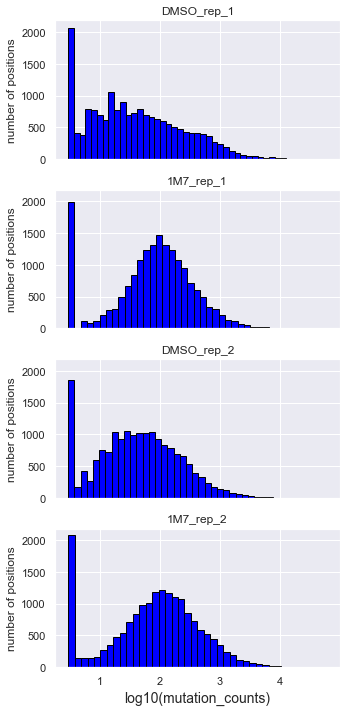

In [10]:
numberofplots = len(files)
numberofbins = 40
fig,ax = plt.subplots(numberofplots,sharex=True,sharey=True,figsize=[5,10])
samples = ["DMSO_rep_1","1M7_rep_1","DMSO_rep_2","1M7_rep_2"]
for i in range(len(files)):
    data = files[i].DMSO_mutation_count
    data += 1
    data = data.apply(np.log10)
    ax[i].hist(data,bins=numberofbins,color='blue',edgecolor='black')
    ax[i].set_title(samples[i])
    ax[i].set_ylabel("number of positions")
ax[-1].set_xlabel("log10(mutation_counts)",fontsize=14)
plt.tight_layout()
fig.savefig("Mutation_count_distributions.pdf",dpi=400)